# Spam Sms Detection

In [139]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import os


In [101]:
for dirname, _, filenames in os.walk(r'C:\Users\Malik'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Malik\.condarc
C:\Users\Malik\NTUSER.DAT
C:\Users\Malik\ntuser.dat.LOG1
C:\Users\Malik\ntuser.dat.LOG2
C:\Users\Malik\NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TM.blf
C:\Users\Malik\NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms
C:\Users\Malik\NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000002.regtrans-ms
C:\Users\Malik\ntuser.ini
C:\Users\Malik\.continuum\anaconda-client\config.yaml
C:\Users\Malik\.ipython\profile_default\history.sqlite
C:\Users\Malik\.ipython\profile_default\history.sqlite-journal
C:\Users\Malik\.ipython\profile_default\startup\README
C:\Users\Malik\.jupyter\migrated
C:\Users\Malik\.matplotlib\fontlist-v330.json
C:\Users\Malik\3D Objects\desktop.ini
C:\Users\Malik\AppData\Local\IconCache.db
C:\Users\Malik\AppData\Local\Comms\Unistore\data\AggregateCache.uca
C:\Users\Malik\AppData\Local\Comms\UnistoreDB\store.jfm
C:\Users\Malik\AppData\Local\Comms\UnistoreDB\store.vol
C:\Users\

C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Default\Web Applications\_crx_agimnkijcaahngcdmfeangaknmldooml\YouTube.ico
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Default\Web Applications\_crx_agimnkijcaahngcdmfeangaknmldooml\YouTube.ico.md5
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Default\Web Applications\_crx_agimnkijcaahngcdmfeangaknmldooml\Shortcuts Menu Icons\0.ico
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Default\Web Applications\_crx_agimnkijcaahngcdmfeangaknmldooml\Shortcuts Menu Icons\1.ico
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Default\Web Applications\_crx_fmgjjmmmlfnkbppncabfkddbjimcfncm\Gmail.ico
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Default\Web Applications\_crx_fmgjjmmmlfnkbppncabfkddbjimcfncm\Gmail.ico.md5
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Default\WebStorage\QuotaManager
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Default\WebStorage\QuotaManager-journal
C:\Users\Malik\AppDa

C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Profile 2\Extensions\nkbihfbeogaeaoehlefnkodbefgpgknn\11.0.0_0\fonts\Roboto\Roboto-Black.ttf
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Profile 2\Extensions\nkbihfbeogaeaoehlefnkodbefgpgknn\11.0.0_0\fonts\Roboto\Roboto-BlackItalic.ttf
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Profile 2\Extensions\nkbihfbeogaeaoehlefnkodbefgpgknn\11.0.0_0\fonts\Roboto\Roboto-Bold.ttf
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Profile 2\Extensions\nkbihfbeogaeaoehlefnkodbefgpgknn\11.0.0_0\fonts\Roboto\Roboto-BoldItalic.ttf
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Profile 2\Extensions\nkbihfbeogaeaoehlefnkodbefgpgknn\11.0.0_0\fonts\Roboto\Roboto-Italic.ttf
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Profile 2\Extensions\nkbihfbeogaeaoehlefnkodbefgpgknn\11.0.0_0\fonts\Roboto\Roboto-Light.ttf
C:\Users\Malik\AppData\Local\Google\Chrome\User Data\Profile 2\Extensions\nkbihfbeogaeaoehlefnkodbefgpgknn\11.0.0

C:\Users\Malik\AppData\Local\Microsoft\Edge\User Data\Default\Service Worker\CacheStorage\3cedfb74d44f2e84198d23075aef16c34a668ceb\b18c1bf4-9f32-40f5-8bcf-250fe9902d15\index-dir\the-real-index
C:\Users\Malik\AppData\Local\Microsoft\Edge\User Data\Default\Service Worker\Database\000003.log
C:\Users\Malik\AppData\Local\Microsoft\Edge\User Data\Default\Service Worker\Database\CURRENT
C:\Users\Malik\AppData\Local\Microsoft\Edge\User Data\Default\Service Worker\Database\LOCK
C:\Users\Malik\AppData\Local\Microsoft\Edge\User Data\Default\Service Worker\Database\LOG
C:\Users\Malik\AppData\Local\Microsoft\Edge\User Data\Default\Service Worker\Database\LOG.old
C:\Users\Malik\AppData\Local\Microsoft\Edge\User Data\Default\Service Worker\Database\MANIFEST-000001
C:\Users\Malik\AppData\Local\Microsoft\Edge\User Data\Default\Service Worker\ScriptCache\4cb013792b196a35_0
C:\Users\Malik\AppData\Local\Microsoft\Edge\User Data\Default\Service Worker\ScriptCache\4cb013792b196a35_1
C:\Users\Malik\AppData\

C:\Users\Malik\AppData\Local\Packages\Microsoft.MicrosoftEdgeDevToolsClient_8wekyb3d8bbwe\Settings\roaming.lock
C:\Users\Malik\AppData\Local\Packages\Microsoft.MicrosoftEdgeDevToolsClient_8wekyb3d8bbwe\Settings\settings.dat
C:\Users\Malik\AppData\Local\Packages\Microsoft.MicrosoftEdge_8wekyb3d8bbwe\LocalState\PinnedTiles\26310719480\squaretile.png
C:\Users\Malik\AppData\Local\Packages\Microsoft.MicrosoftEdge_8wekyb3d8bbwe\LocalState\PinnedTiles\26310719480\tinytile.png
C:\Users\Malik\AppData\Local\Packages\Microsoft.MicrosoftEdge_8wekyb3d8bbwe\LocalState\PinnedTiles\38975140460\squaretile.png
C:\Users\Malik\AppData\Local\Packages\Microsoft.MicrosoftEdge_8wekyb3d8bbwe\LocalState\PinnedTiles\38975140460\tinytile.png
C:\Users\Malik\AppData\Local\Packages\Microsoft.MicrosoftEdge_8wekyb3d8bbwe\LocalState\PinnedTiles\6501008900\squaretile.png
C:\Users\Malik\AppData\Local\Packages\Microsoft.MicrosoftEdge_8wekyb3d8bbwe\LocalState\PinnedTiles\6501008900\tinytile.png
C:\Users\Malik\AppData\Local

C:\Users\Malik\AppData\Local\Packages\Microsoft.WindowsCalculator_8wekyb3d8bbwe\Settings\roaming.lock
C:\Users\Malik\AppData\Local\Packages\Microsoft.WindowsCalculator_8wekyb3d8bbwe\Settings\settings.dat
C:\Users\Malik\AppData\Local\Packages\Microsoft.WindowsCalculator_8wekyb3d8bbwe\Settings\settings.dat.LOG1
C:\Users\Malik\AppData\Local\Packages\Microsoft.WindowsCalculator_8wekyb3d8bbwe\Settings\settings.dat.LOG2
C:\Users\Malik\AppData\Local\Packages\Microsoft.WindowsCamera_8wekyb3d8bbwe\AC\INetCache\container.dat
C:\Users\Malik\AppData\Local\Packages\Microsoft.WindowsCamera_8wekyb3d8bbwe\AC\INetCookies\ESE\container.dat
C:\Users\Malik\AppData\Local\Packages\Microsoft.WindowsCamera_8wekyb3d8bbwe\AC\Microsoft\CryptnetUrlCache\Content\57C8EDB95DF3F0AD4EE2DC2B8CFD4157
C:\Users\Malik\AppData\Local\Packages\Microsoft.WindowsCamera_8wekyb3d8bbwe\AC\Microsoft\CryptnetUrlCache\Content\77EC63BDA74BD0D0E0426DC8F8008506
C:\Users\Malik\AppData\Local\Packages\Microsoft.WindowsCamera_8wekyb3d8bbwe\

In [102]:
read_file =pd.read_csv(r"C:\Users\Malik\Downloads\Compressed\spam.csv", encoding='ISO-8859-1')

In [103]:
read_file

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Preprocessing

In [104]:
df.rename(columns={'v2':'sms','v1':'Label'},inplace=True)
df

,Label,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [105]:
X = df['sms']  # SMS messages
y = df['Label']    # Spam or legitimate labels


In [106]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = text.split()
    words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

X = X.apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Malik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
df.duplicated().sum()

403

In [108]:
df=df.drop_duplicates()

In [109]:
df.duplicated().sum()

0

# Data Visualization

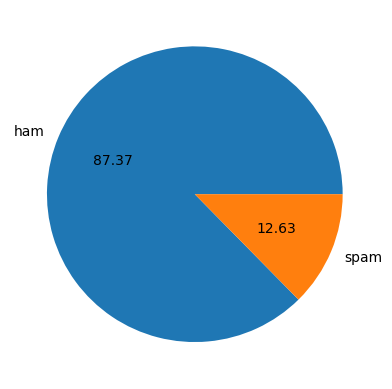

In [110]:
plt.pie(df['Label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

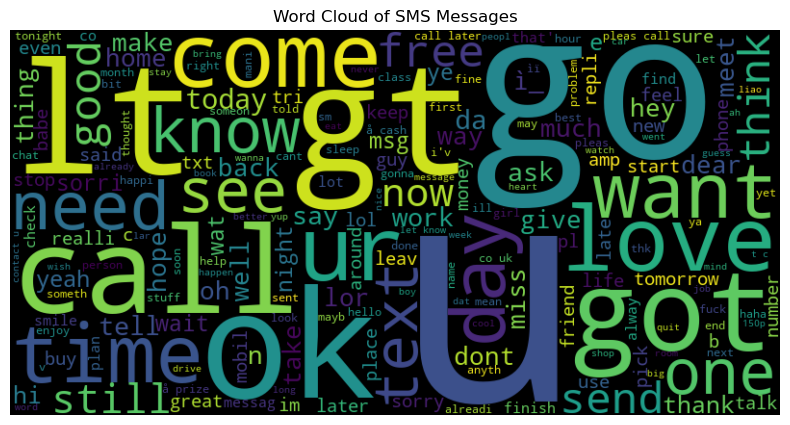

In [111]:
from wordcloud import WordCloud

# Combine all SMS messages into one text
all_text = ' '.join(X)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of SMS Messages')
plt.show()


# Data Splitting

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.sms, df.Label, test_size=0.25,random_state=42)

# Model Building

Naive Byes

In [142]:
Model=Pipeline(
[
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('Multi NB',MultinomialNB())
])
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1107
        spam       1.00      0.65      0.78       186

    accuracy                           0.95      1293
   macro avg       0.97      0.82      0.88      1293
weighted avg       0.95      0.95      0.94      1293

0.9489559164733179


Logistic Regression

In [148]:
# from sklearn.pipeline impor
model1=Pipeline([
    ('Vectorizer_tfidf',TfidfVectorizer(max_features=5000)),
    ('Logistic_R',LogisticRegression())
])
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9667440061871616
[[1104    3]
 [  40  146]]


SVM Classifier

In [152]:
model2=Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer(max_features=5000)),
    ('SVC',SVC())
])
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1107
        spam       1.00      0.89      0.94       186

    accuracy                           0.98      1293
   macro avg       0.99      0.94      0.97      1293
weighted avg       0.98      0.98      0.98      1293

0.9837587006960556


I created the pipeline in the three different models. Naive Bayes scored 94.9% accuracy, Logistic Regression got 96.7%,
and the mighty SVC reached 98.4%. As you can see that SVC is the best model for Spam SMS Detection.They protected the 
messages, making sure they were sorted correctly.